In [1]:
import pandas as pd  # also install lxml
import requests
import polaris as po
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results_dict = {
    "polaris/pkis2-ret-wt-cls-v2": 0.5549745949225589,
    "polaris/adme-fang-solu-1": 0.553137974207264,
    "polaris/adme-fang-rppb-1": 0.829839712042375,
    "polaris/adme-fang-hppb-1": 0.811771727726447,
    "polaris/adme-fang-perm-1": 0.7823891182862969,
    "polaris/adme-fang-rclint-1": 0.6964194586130155,
    "polaris/adme-fang-hclint-1": 0.7335960044737955,
    "tdcommons/clearance-microsome-az": 0.6522420931698281,
    "tdcommons/dili": 0.8778260869565219,
    "tdcommons/bioavailability-ma": 0.578317259727303,
    "tdcommons/vdss-lombardo": 0.5949322067855739,
    "tdcommons/herg": 0.8192930780559646
}

In [3]:
best_models, metadata = {}, {}
for benchmark_name in results_dict.keys():
    benchmark = po.load_benchmark(benchmark_name)
    response = requests.get(f'https://polarishub.io/benchmarks/{benchmark_name}')
    results_table = pd.read_html(response.text)[0]
    best = results_table[benchmark.main_metric.label][0]
    if isinstance(best, str):
        best = 0.0
    best_models[benchmark_name] = best
    metadata[benchmark_name] = {
        "metric": benchmark.main_metric.label,
        "best_name": results_table['Name'][0],
    }

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[2025-04-09 23:47:47] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=830081;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=308737;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=891247;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=227874;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:47:47]  Success: Fetching dataset                                                                 ]8;id=20472;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=540646;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=755408;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=920916;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=982730;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=50204;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=987545;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=214533;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:47:49] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=868164;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=980711;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=95426;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=767183;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:47:49]  Success: Fetching dataset                                                                 ]8;id=602229;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=221454;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=157970;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=230116;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

[2025-04-09 23:47:50] WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=308767;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=247120;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

[23:47:50]  Success: Fetching benchmark                                                               ]8;id=393781;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=517051;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:47:52] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=994562;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=922139;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=160851;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=665793;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:47:52]  Success: Fetching dataset                                                                 ]8;id=772114;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=562110;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=503373;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=907325;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=48726;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=764517;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=694689;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=459407;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:47:54] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=772162;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=834608;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=744037;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=76712;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:47:54]  Success: Fetching dataset                                                                 ]8;id=294767;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=494792;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=138999;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=460638;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=648398;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=885523;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=105982;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=945913;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:47:56] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=387507;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=700960;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=69526;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=67362;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:47:56]  Success: Fetching dataset                                                                 ]8;id=534555;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=710249;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=694758;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=452825;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=487212;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=734196;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=200494;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=812026;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:47:58] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=2336;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=92581;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=516480;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=830357;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:47:58]  Success: Fetching dataset                                                                 ]8;id=509154;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=102178;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=604102;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=647997;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=133968;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=398975;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=548462;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=479997;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:48:00] INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=406915;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=386859;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=721679;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=320456;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:48:00]  Success: Fetching dataset                                                                 ]8;id=78423;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=989635;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (0.0.0)  ]8;id=120961;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=158166;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.10).                                                                          

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=829079;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=470984;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=232224;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=417020;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:48:02] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=923773;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=978946;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=542070;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=657447;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:48:02]  Success: Fetching dataset                                                                 ]8;id=938663;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=945036;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=245658;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=200768;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=730425;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=136139;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=167017;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=508916;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:48:04] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=30208;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=533949;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=365765;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=717264;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:48:04]  Success: Fetching dataset                                                                 ]8;id=609182;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=16363;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=120084;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=166243;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=481698;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=71310;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=416246;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=905411;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:48:06] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=187405;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=308386;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=916533;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=559973;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:48:06]  Success: Fetching dataset                                                                 ]8;id=747846;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=678062;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=129481;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=308052;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=518139;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=734202;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=297440;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=6793;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:48:08] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=968591;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=481767;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=469035;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=931811;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:48:08]  Success: Fetching dataset                                                                 ]8;id=407871;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=843679;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=599200;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=876568;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=223505;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=629267;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=89597;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=630992;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


[2025-04-09 23:48:10] INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=866665;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=814512;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      INFO     To verify the checksum, we need to recompute it. This can be slow    ]8;id=133524;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=291855;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#67\67]8;;\
                               for large datasets.                                                                 

/home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[23:48:10]  Success: Fetching dataset                                                                 ]8;id=518341;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=701464;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

                      INFO     The version of Polaris that was used to create the artifact (dev) is ]8;id=482690;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=656054;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               different from the currently installed version of Polaris (0.11.10).                

                      WARNING  No checksum to verify against. Specify either the md5sum parameter   ]8;id=466013;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py\_checksum.py]8;;\:]8;id=323951;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/mixins/_checksum.py#60\60]8;;\
                               or store the checksum in the dataset.md5sum attribute.                              

            Success: Fetching benchmark                                                               ]8;id=394172;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=149211;file:///home/jackson/miniconda3/envs/ff_tune/lib/python3.11/site-packages/polaris/utils/context.py#53\53]8;;\

/tmp/ipykernel_841781/3200898220.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(response.text)[0]


In [4]:
chemprop_results = {
    "polaris/pkis2-ret-wt-cls-v2": 0.4022174328484946,
    "polaris/adme-fang-solu-1": 0.5962083321846253,
    "polaris/adme-fang-rppb-1": 0.22811751509425005,
    "polaris/adme-fang-hppb-1": 0.5839256862476387,
    "polaris/adme-fang-perm-1": 0.6860496540025689,
    "polaris/adme-fang-rclint-1": 0.6993555044203762,
    "polaris/adme-fang-hclint-1": 0.6587254331645709,
    "tdcommons/clearance-microsome-az": 0.4447433483975412,
    "tdcommons/dili": 0.9086956521739131,
    "tdcommons/bioavailability-ma": 0.5839707349517792,
    "tdcommons/vdss-lombardo": 0.47940850366929666,
    "tdcommons/herg": 0.6846833578792342
}

In [5]:
pubchem_2stage = {
    "polaris/pkis2-ret-wt-cls-v2": 0.3267776301792442,
    "polaris/adme-fang-solu-1": 0.527832251355056,
    "polaris/adme-fang-rppb-1": 0.708371815306115,
    "polaris/adme-fang-hppb-1": 0.8579252788679982,
    "polaris/adme-fang-perm-1": 0.7740801417304662,
    "polaris/adme-fang-rclint-1": 0.6737363631713124,
    "polaris/adme-fang-hclint-1": 0.6602905411087054,
    "tdcommons/clearance-microsome-az": 0.5675977755842222,
    "tdcommons/dili": 0.8891304347826087,
    "tdcommons/bioavailability-ma": 0.6554705686730962,
    "tdcommons/vdss-lombardo": 0.49907520074864786,
    "tdcommons/herg": 0.8593519882179675
}

In [6]:
pubchem_tune = {
    "polaris/pkis2-ret-wt-cls-v2": 0.5549745949225589,
    "polaris/adme-fang-solu-1": 0.553137974207264,
    "polaris/adme-fang-rppb-1": 0.829839712042375,
    "polaris/adme-fang-hppb-1": 0.811771727726447,
    "polaris/adme-fang-perm-1": 0.7823891182862969,
    "polaris/adme-fang-rclint-1": 0.6964194586130155,
    "polaris/adme-fang-hclint-1": 0.7335960044737955,
    "tdcommons/clearance-microsome-az": 0.6522420931698281,
    "tdcommons/dili": 0.8778260869565219,
    "tdcommons/bioavailability-ma": 0.578317259727303,
    "tdcommons/vdss-lombardo": 0.5949322067855739,
    "tdcommons/herg": 0.8192930780559646
}

In [7]:
pubchem_10mm_tune = {
    "polaris/pkis2-ret-wt-cls-v2": 0.5540221458530018,
    "polaris/adme-fang-solu-1": 0.5245044485571635,
    "polaris/adme-fang-rppb-1": 0.7970088942595197,
    "polaris/adme-fang-hppb-1": 0.8225468440630592,
    "polaris/adme-fang-perm-1": 0.7789273077010064,
    "polaris/adme-fang-rclint-1": 0.7081583147730377,
    "polaris/adme-fang-hclint-1": 0.7372456250671466,
    "tdcommons/clearance-microsome-az": 0.6407265164819285,
    "tdcommons/dili": 0.9004347826086956,
    "tdcommons/bioavailability-ma": 0.6055869637512471,
    "tdcommons/vdss-lombardo": 0.4262144981893218,
    "tdcommons/herg": 0.8257731958762887
}

In [8]:
pubchem_tune_skipconn = {
    "polaris/pkis2-ret-wt-cls-v2": 0.5578642439667086,
    "polaris/adme-fang-solu-1": 0.5226252173093836,
    "polaris/adme-fang-rppb-1": 0.8369651112652248,
    "polaris/adme-fang-hppb-1": 0.8102237719964719,
    "polaris/adme-fang-perm-1": 0.7550511170118788,
    "polaris/adme-fang-rclint-1": 0.5191526809544197,
    "polaris/adme-fang-hclint-1": 0.735762320501199,
    "tdcommons/clearance-microsome-az": 0.6533572918397021,
    "tdcommons/dili": 0.9030434782608696,
    "tdcommons/bioavailability-ma": 0.5690056534752246,
    "tdcommons/vdss-lombardo": 0.5366494669819122,
    "tdcommons/herg": 0.7983799705449189
}

In [9]:
direct_2stage = {
    "polaris/pkis2-ret-wt-cls-v2": 0.5412756369187944,
    "polaris/adme-fang-solu-1": 0.5623477137537134,
    "polaris/adme-fang-rppb-1": 0.734992730572206,
    "polaris/adme-fang-hppb-1": 0.8023085287623986,
    "polaris/adme-fang-perm-1": 0.762975578612206,
    "polaris/adme-fang-rclint-1": 0.6934544890196597,
    "polaris/adme-fang-hclint-1": 0.6640851064142529,
    "tdcommons/clearance-microsome-az": 0.5322539880911634,
    "tdcommons/dili": 0.8717391304347826,
    "tdcommons/bioavailability-ma": 0.6298636514798802,
    "tdcommons/vdss-lombardo": 0.4028168757641282,
    "tdcommons/herg": 0.8525773195876288
}

In [10]:
direct_mlp = {
    "polaris/pkis2-ret-wt-cls-v2": 0.5877503446437353,
    "polaris/adme-fang-solu-1": 0.5137399923027794,
    "polaris/adme-fang-rppb-1": 0.8367111167559524,
    "polaris/adme-fang-hppb-1": 0.36662984377429153,
    "polaris/adme-fang-perm-1": 0.7600896402080778,
    "polaris/adme-fang-rclint-1": 0.6651040211208981,
    "polaris/adme-fang-hclint-1": 0.631004072795596,
    "tdcommons/clearance-microsome-az": 0.4608363925799375,
    "tdcommons/dili": 0.9113043478260869,
    "tdcommons/bioavailability-ma": 0.69271699368141,
    "tdcommons/vdss-lombardo": 0.5092558099062606,
    "tdcommons/herg": 0.8440353460972017
}

## Comparison against local benchmarks

In [11]:
# df = pd.DataFrame.from_dict({"ChemProp": chemprop_results, "direct mlp": direct_mlp, "direct 2 stage": direct_2stage, "pubchem tune": pubchem_tune, "pubchem 2 stage": pubchem_2stage, "pubchem 1 stage skipconn": pubchem_tune_skipconn})
df = pd.DataFrame.from_dict({"ChemProp": chemprop_results, "direct mlp": direct_mlp, "pubchem 1MM": pubchem_tune, "pubchem 10MM": pubchem_10mm_tune})

--- Ranks per Benchmark (1 = Best, using metadata) ---
                                  ChemProp  direct mlp  pubchem 1MM  \
polaris/pkis2-ret-wt-cls-v2            4.0         1.0          2.0   
polaris/adme-fang-solu-1               1.0         4.0          2.0   
polaris/adme-fang-rppb-1               4.0         1.0          2.0   
polaris/adme-fang-hppb-1               3.0         4.0          2.0   
polaris/adme-fang-perm-1               4.0         3.0          1.0   
polaris/adme-fang-rclint-1             2.0         4.0          3.0   
polaris/adme-fang-hclint-1             3.0         4.0          2.0   
tdcommons/clearance-microsome-az       4.0         3.0          1.0   
tdcommons/dili                         2.0         1.0          4.0   
tdcommons/bioavailability-ma           3.0         1.0          4.0   
tdcommons/vdss-lombardo                3.0         2.0          1.0   
tdcommons/herg                         4.0         1.0          3.0   

                     

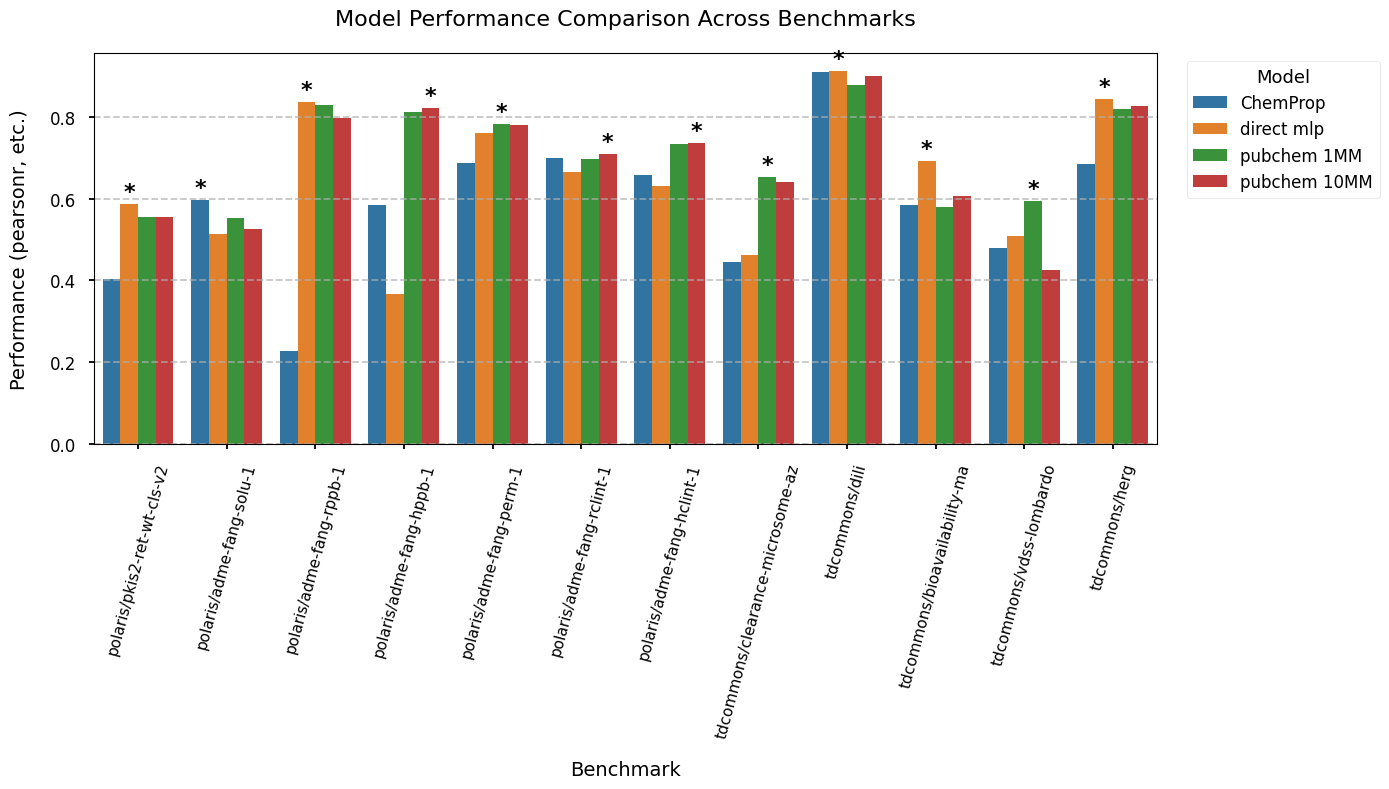

In [12]:
# --- 2. Define Metric Properties ---
# Define which metrics are better when higher
HIGHER_IS_BETTER_METRICS = {'roc_auc', 'pr_auc', 'pearsonr', 'spearmanr', 'accuracy', 'f1'}
# Add any other metrics where higher values are better
# Metrics not in this set will be assumed to have lower values as better (e.g., rmse, mae)

def get_ascending_for_metric(metric_name):
    """
    Determines if ranking should be ascending for a given metric.
    rank(ascending=False) means higher values get lower ranks (rank 1).
    rank(ascending=True) means lower values get lower ranks (rank 1).
    Returns the value for the 'ascending' parameter in pandas rank.
    """
    return metric_name not in HIGHER_IS_BETTER_METRICS

# --- 3. Calculate Performance Statistics ---

# 3.2. Calculate Ranks per Benchmark (using metadata)
def rank_row(row):
    benchmark_name = row.name
    if benchmark_name not in metadata:
        print(f"Warning: Benchmark '{benchmark_name}' not found in metadata. Skipping ranking.")
        return pd.Series([np.nan] * len(row), index=row.index) # Return NaNs if no metadata

    metric = metadata[benchmark_name].get('metric')
    if not metric:
         print(f"Warning: Metric not found for benchmark '{benchmark_name}' in metadata. Skipping ranking.")
         return pd.Series([np.nan] * len(row), index=row.index) # Return NaNs if no metric

    ascending = get_ascending_for_metric(metric)
    # method='min' assigns the minimum rank to tied models
    return row.rank(ascending=ascending, method='min')

# Apply the ranking function row-wise
ranks = df.apply(rank_row, axis=1)
print("--- Ranks per Benchmark (1 = Best, using metadata) ---")
print(ranks)
print("\n" + "="*30 + "\n")

# 3.3. Calculate Average Place (Average Rank) per Model
# Drop benchmarks that couldn't be ranked (if any NaNs occurred) before calculating mean
average_place = ranks.dropna(axis=0, how='all').mean(axis=0).sort_values()
print("--- Average Place (Rank) per Model (Lower is Better) ---")
print(average_place)
print("\n" + "="*30 + "\n")

# 3.4. (Optional) Count Number of #1 Finishes per Model
first_place_finishes = (ranks == 1).sum(axis=0).sort_values(ascending=False)
print("--- Number of #1 Finishes per Model ---")
print(first_place_finishes)
print("\n" + "="*30 + "\n")

# --- 4. Plotting: Grouped Bar Chart with Best Model Indicator ---

# 4.1. Prepare data for plotting (melt the DataFrame)
# We need the metric name for the y-axis label, but it varies.
# Let's use a generic name or pick the most common one.
all_metrics = [m.get('metric', 'N/A') for m in metadata.values()]
most_common_metric = pd.Series(all_metrics).mode()[0] if all_metrics else "Performance Score"
y_axis_label = f"Performance ({most_common_metric}, etc.)" # Indicate mixed metrics

df_melted = df.reset_index().rename(columns={'index': 'Benchmark'})
df_melted = df_melted.melt(id_vars='Benchmark', var_name='Model', value_name='Performance') # Use generic 'Performance'


# 4.2. Create the plot
plt.style.use('seaborn-v0_8-talk')
fig, ax = plt.subplots(figsize=(14, 8)) # Adjust figsize as needed

# Ensure consistent order for models in plot and legend
model_order = df.columns.tolist()

sns.barplot(
    x='Benchmark',
    y='Performance',
    hue='Model',
    data=df_melted,
    ax=ax,
    order=df.index.tolist(), # Ensure benchmark order matches original df
    hue_order=model_order   # Ensure model order matches original df
    # ci=None # Uncomment if you don't want error bars
)

# 4.3. Customize for Publication Quality
ax.set_title('Model Performance Comparison Across Benchmarks', fontsize=16, pad=20)
ax.set_xlabel('Benchmark', fontsize=14, labelpad=15)
ax.set_ylabel(y_axis_label, fontsize=14, labelpad=15)
ax.tick_params(axis='x', rotation=75, labelsize=11) # Rotate x-axis labels more if needed
ax.tick_params(axis='y', labelsize=12)
ax.legend(title='Model', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 4.4 Add Asterisk for Best Model per Benchmark
# Check if ranks DataFrame is not empty
if not ranks.empty:
    models_in_plot = model_order # Use the defined model order
    benchmarks_in_plot = df.index.tolist() # Use the defined benchmark order

    # Map benchmark names to their index in the plot (0, 1, 2...)
    benchmark_indices = {name: i for i, name in enumerate(benchmarks_in_plot)}

    # Iterate through the bar containers (one container per model)
    for model_idx, container in enumerate(ax.containers):
        model_name = models_in_plot[model_idx]

        # Iterate through the bars in this container (one bar per benchmark)
        for bar_idx, bar in enumerate(container):
            # Sometimes bar_idx might not align perfectly if data is missing,
            # It's safer to try and determine benchmark from bar's x position center
            # but let's first assume the simple index mapping works.
            try:
                 # Get the benchmark name corresponding to this bar's index position
                benchmark_name = benchmarks_in_plot[bar_idx]
                benchmark_rank_series = ranks.loc[benchmark_name]

                # Check if the rank exists is 1 for this model and benchmark
                if np.isclose(benchmark_rank_series[model_name], 1.0):
                    # Add asterisk above this bar
                    x_pos = bar.get_x() + bar.get_width() / 2
                    y_pos = bar.get_height()
                    # Add a small offset to y_pos so asterisk isn't touching the bar
                    offset = 0.005 * ax.get_ylim()[1] # Adjust offset as needed
                    ax.text(x_pos, y_pos + offset, '*', ha='center', va='bottom', color='k', fontsize=16, fontweight='bold')
            except IndexError:
                 print(f"Warning: Could not match bar index {bar_idx} to benchmark name. Skipping asterisk.")
            except KeyError:
                 print(f"Warning: Could not find rank for model '{model_name}' or benchmark '{benchmark_name}'. Skipping asterisk.")
else:
    print("Warning: Ranks DataFrame is empty, cannot add best model indicators.")


plt.tight_layout() # Adjust layout

# 4.5. Save the plot (optional)
# plt.savefig('model_performance_comparison_metadata.png', dpi=300, bbox_inches='tight')
# plt.savefig('model_performance_comparison_metadata.pdf', bbox_inches='tight')

# 4.6. Show the plot
plt.show()

## Comparison against SOTA on `polaris`

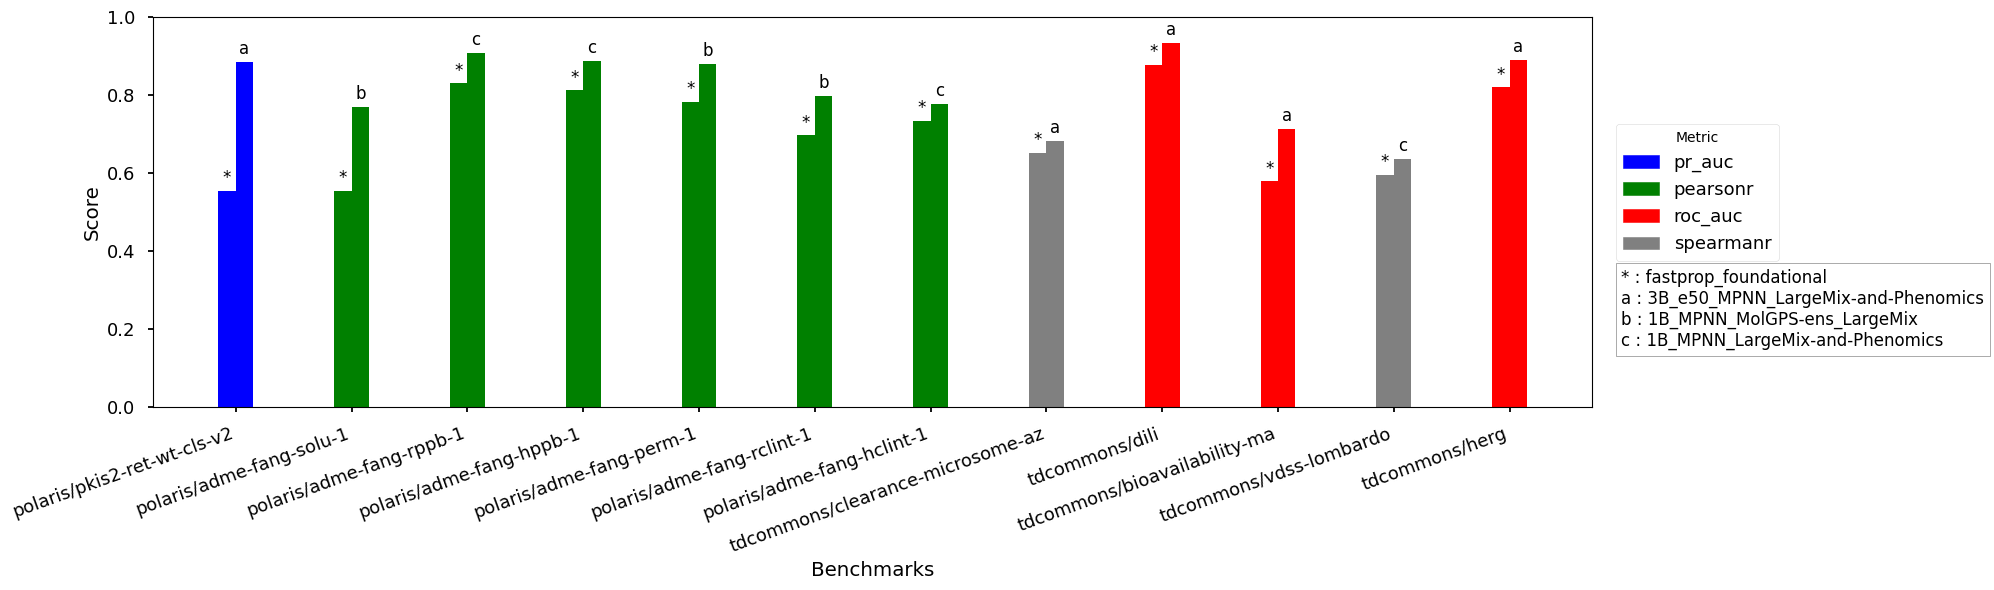

In [13]:
benchmarks = list(metadata.keys())
metrics = [d['metric'] for d in metadata.values()]
sota_name = [d['best_name'] for d in metadata.values()]
developing_values = [results_dict[b] for b in benchmarks]
sota_values = [best_models[b] for b in benchmarks]

# Assigning colors based on the metric
metric_colors = {'pr_auc': 'blue', 'pearsonr': 'green', 'roc_auc': 'red', 'spearmanr': 'grey'}
bar_colors = [metric_colors[metadata[b]['metric']] for b in benchmarks]

# Assign unique symbols for models
model_symbols = {}
model_symbols['fastprop_foundational'] = "*"
syms = iter('abcdefghijklmnopqrstuvwxyz')
for name in sota_name:
    if model_symbols.get(name, None) is None:
        model_symbols[name] = next(syms)

# Bar width and positioning
x = np.arange(len(benchmarks)) * 2  # Increased spacing between groups
width = 0.3 

# Plot bars
fig, ax = plt.subplots(figsize=(20, 6))
bars1 = ax.bar(x - width/2, developing_values, width, label="fastprop_foundation", color=bar_colors)
bars2 = ax.bar(x + width/2, sota_values, width, label="SOTA Model", color=bar_colors)

# Labels and titles
ax.set_xlabel("Benchmarks")
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(benchmarks, rotation=20, ha="right")

# Add symbols on top of bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, model_symbols['fastprop_foundational'], ha='center', fontsize=12, rotation=0)

for bar, model in zip(bars2, sota_name):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, model_symbols[model], ha='center', fontsize=12, rotation=0)

# Legend for metrics
handles = [plt.Rectangle((0,0),1,1, color=color) for color in metric_colors.values()]
metric_labels = list(metric_colors.keys())
ax.legend(handles, metric_labels, title="Metric", bbox_to_anchor=(1.01, 0.75))

# Add symbol lookup legend
symbol_legend = '\n'.join([f"{sym} : {model}" for model, sym in model_symbols.items()])
plt.text(1.02, 0.25, symbol_legend, transform=ax.transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.6))

# Show plot
plt.ylim((0.0, 1.0))
plt.tight_layout()
plt.show()